In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn
import os

In [2]:
THIS_PATH = os.getcwd()
PARENT_PATH  = os.path.dirname(THIS_PATH)
DATA_DIR = os.path.join(PARENT_PATH, 'data_extract')

cards = pd.read_csv(os.path.join(DATA_DIR, 'cards_by_subtype.csv'))

cards = cards.convert_objects(convert_numeric=True)

# We have some cards with missing HP values, we will drop them, as these are mostly some specialty cards
# in the HeartGold & SoulSilver set. See examples:
# https://images.pokemontcg.io/hgss1/112.png
# https://images.pokemontcg.io/hgss1/114.png
cards.dropna(inplace=True)

/Users/cynthiasadler/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
cards.head()

,ID,Name,HP,RetreatCostCount,AttackCount,AttackConvertedEnergyCostTotal,WeaknessTotal,ResistanceTotal,Ability,Subtype
234,pl4-1,Charizard,140.0,3,2,4,30.0,-20.0,1,Stage 2
238,pl4-5,Luxray,120.0,0,2,4,30.0,-20.0,0,Stage 2
239,pl4-6,Mothim,90.0,0,2,2,20.0,-20.0,0,Stage 1
240,pl4-7,Probopass,100.0,3,2,5,20.0,-20.0,1,Stage 1
241,pl4-8,Salamence,140.0,2,2,7,30.0,-20.0,1,Stage 2


In [4]:
cards.shape

(431, 10)

In [5]:
cards.Subtype.value_counts()

Basic       212
Stage 1     160
Stage 2      57
Level Up      2
Name: Subtype, dtype: int64

In [6]:
# since Basic, Stage 1, and Stage 2 are the more common subtypes, let's drop Level Up
cards = cards[cards.Subtype != 'Level Up']
cards.shape

(429, 10)

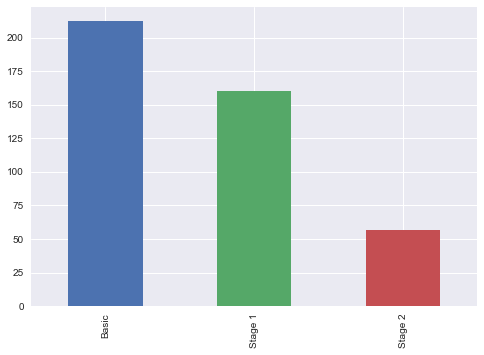

In [7]:
cards.Subtype.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0d103278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a160f5da0>]], dtype=object)

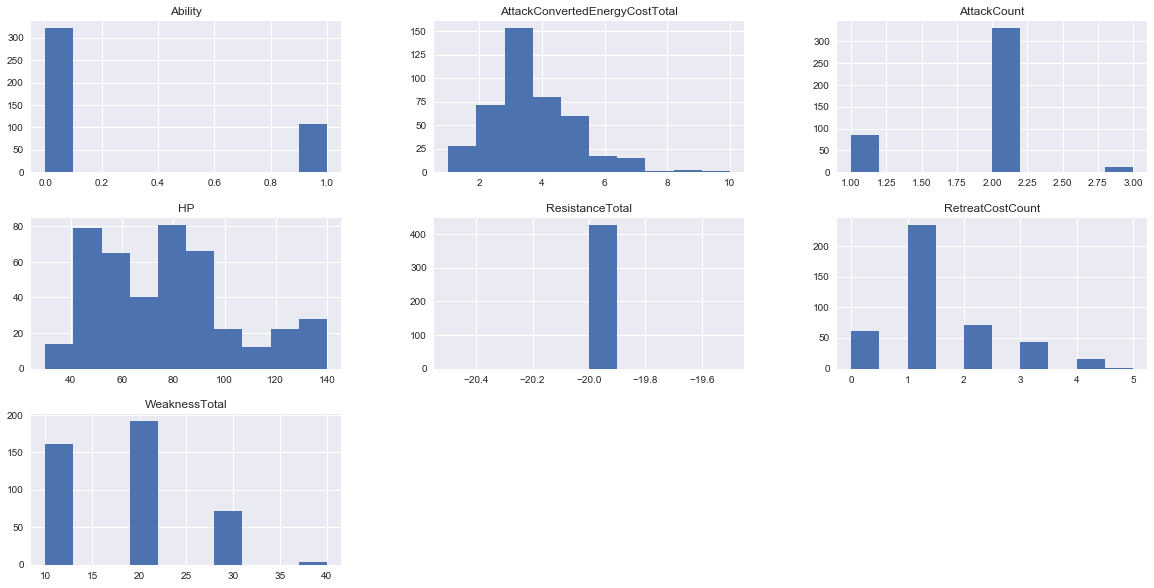

In [8]:
cards.hist(figsize=(20,10))

Subtype
Basic      [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Stage 1    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
Stage 2    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

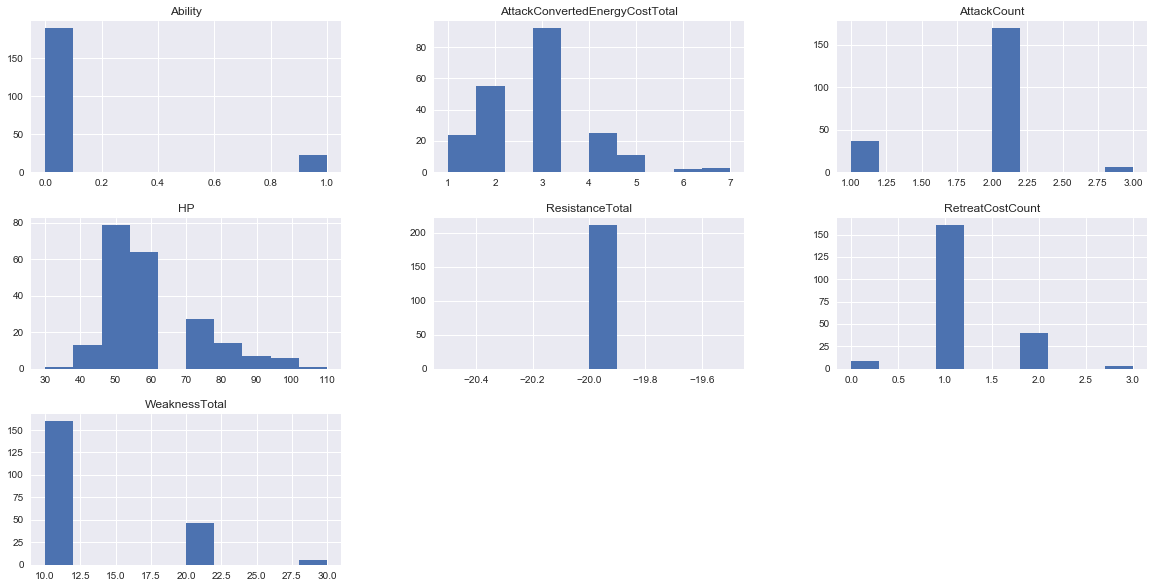

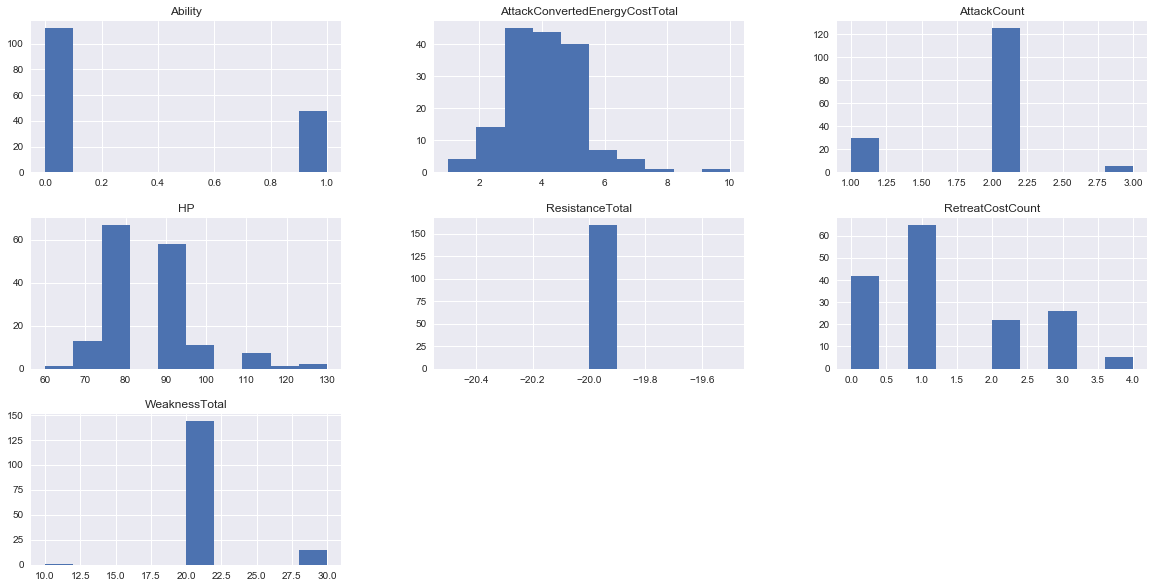

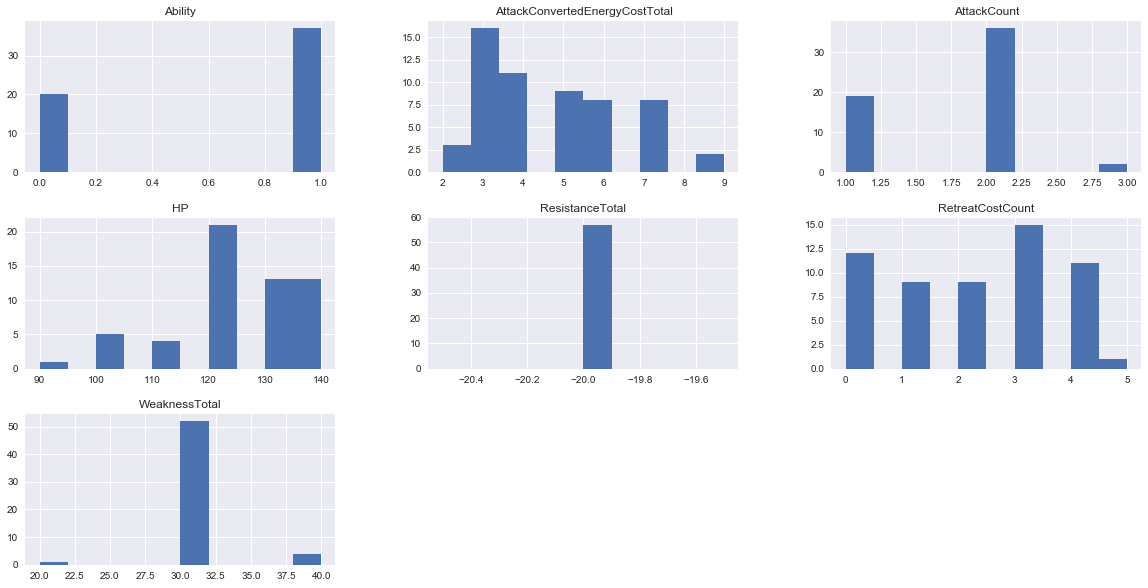

In [9]:
# look at these histograms by Subtype
cards.groupby('Subtype').hist(figsize=(20,10))

Subtype
Basic      Axes(0.125,0.125;0.775x0.755)
Stage 1    Axes(0.125,0.125;0.775x0.755)
Stage 2    Axes(0.125,0.125;0.775x0.755)
Name: HP, dtype: object

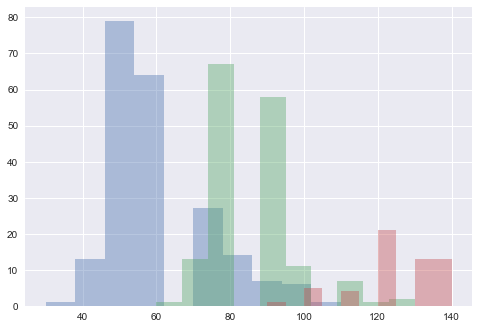

In [10]:
# let's drill into HP by Subtype
cards.groupby('Subtype').HP.hist(alpha=0.4)

In [11]:
# use Pearson's correlation to check for any relationships
correlation = cards.corr()
correlation

,HP,RetreatCostCount,AttackCount,AttackConvertedEnergyCostTotal,WeaknessTotal,ResistanceTotal,Ability
HP,1.000000,0.494621,0.018446,0.639561,0.911656,NaN,0.374217
RetreatCostCount,0.494621,1.000000,-0.008659,0.451301,0.381503,NaN,0.122475
AttackCount,0.018446,-0.008659,1.000000,0.518717,-0.026596,NaN,-0.533474
AttackConvertedEnergyCostTotal,0.639561,0.451301,0.518717,1.000000,0.568891,NaN,-0.043873
WeaknessTotal,0.911656,0.381503,-0.026596,0.568891,1.000000,NaN,0.381233
ResistanceTotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ability,0.374217,0.122475,-0.533474,-0.043873,0.381233,NaN,1.000000


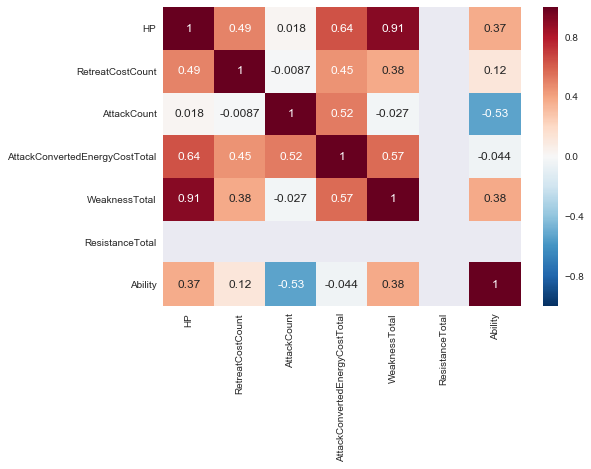

In [12]:
# this is better visualized with a heatmap
seaborn.heatmap(correlation, annot = True)